In [65]:
import os
os.curdir
os.chdir('/Users/manojravikumar/Public/60162417/05-tutorials/14-aiml/machine-learning-practice/supervised')


import warnings
warnings.filterwarnings("ignore")

## Logistic Regression with ROC Curve

In [170]:
from sklearn.datasets import make_classification
X4,y4 = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=35)

# scores = []
# for rs in range(10, 60):   # try different random states
#     X4b_train, X4b_test, y4b_train, y4b_test = train_test_split(X4, y4, test_size=0.2, random_state=rs)
#     logreg4b = LogisticRegression(max_iter=1000)
#     logreg4b.fit(X4b_train, y4b_train)
#     y4b_pred_prob = logreg4b.predict_proba(X4b_test)[:, 1]
#     auc4b = roc_auc_score(y4b_test, y4b_pred_prob)
#     scores.append((rs, auc4b))

# best_rs, best_auc = max(scores, key=lambda x: x[1])
# print("Best random_state:", best_rs, "with AUC:", best_auc)


X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=49)
logreg4 = LogisticRegression(max_iter=1000)
logreg4.fit(X4_train, y4_train)
y4_pred_prob=logreg4.predict_proba(X4_test)
print(y4_pred_prob[0:4,:-1])
dummy_y4=np.zeros(y4_test.shape,dtype=int)


from sklearn.metrics import roc_auc_score
dummy_score=roc_auc_score(y4_test,dummy_y4)
y4_score=roc_auc_score(y4_test,y4_pred_prob[:,-1])
print("Dummy Model ROC score is ", dummy_score)
print("Real Model ROC score is ", y4_score)



# from sklearn.model_selection import StratifiedKFold, cross_val_score
# logreg4c = LogisticRegression(max_iter=1000)
# cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(logreg4c, X4, y4, cv=cv5, scoring="roc_auc")
# print(scores)



Best random_state: 49 with AUC: 0.9505
[[0.06234382]
 [0.93856162]
 [0.88217882]
 [0.28294325]]
Dummy Model ROC score is  0.5
Real Model ROC score is  0.9505


In [174]:
from sklearn.metrics import roc_curve
dummy_fpr, dummy_tpr, _ = roc_curve(y4_test, dummy_y4)
model_fpr, model_tpr, thresholds = roc_curve(y4_test, y4_pred_prob[:,-1])

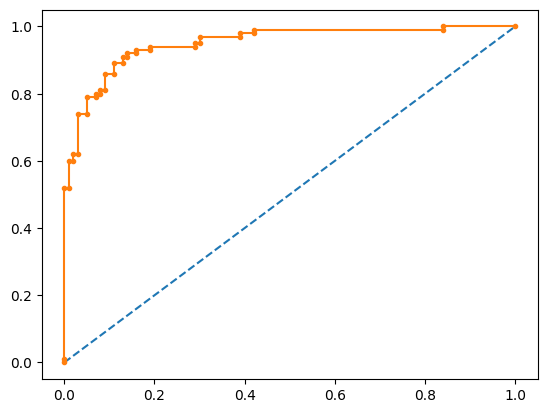

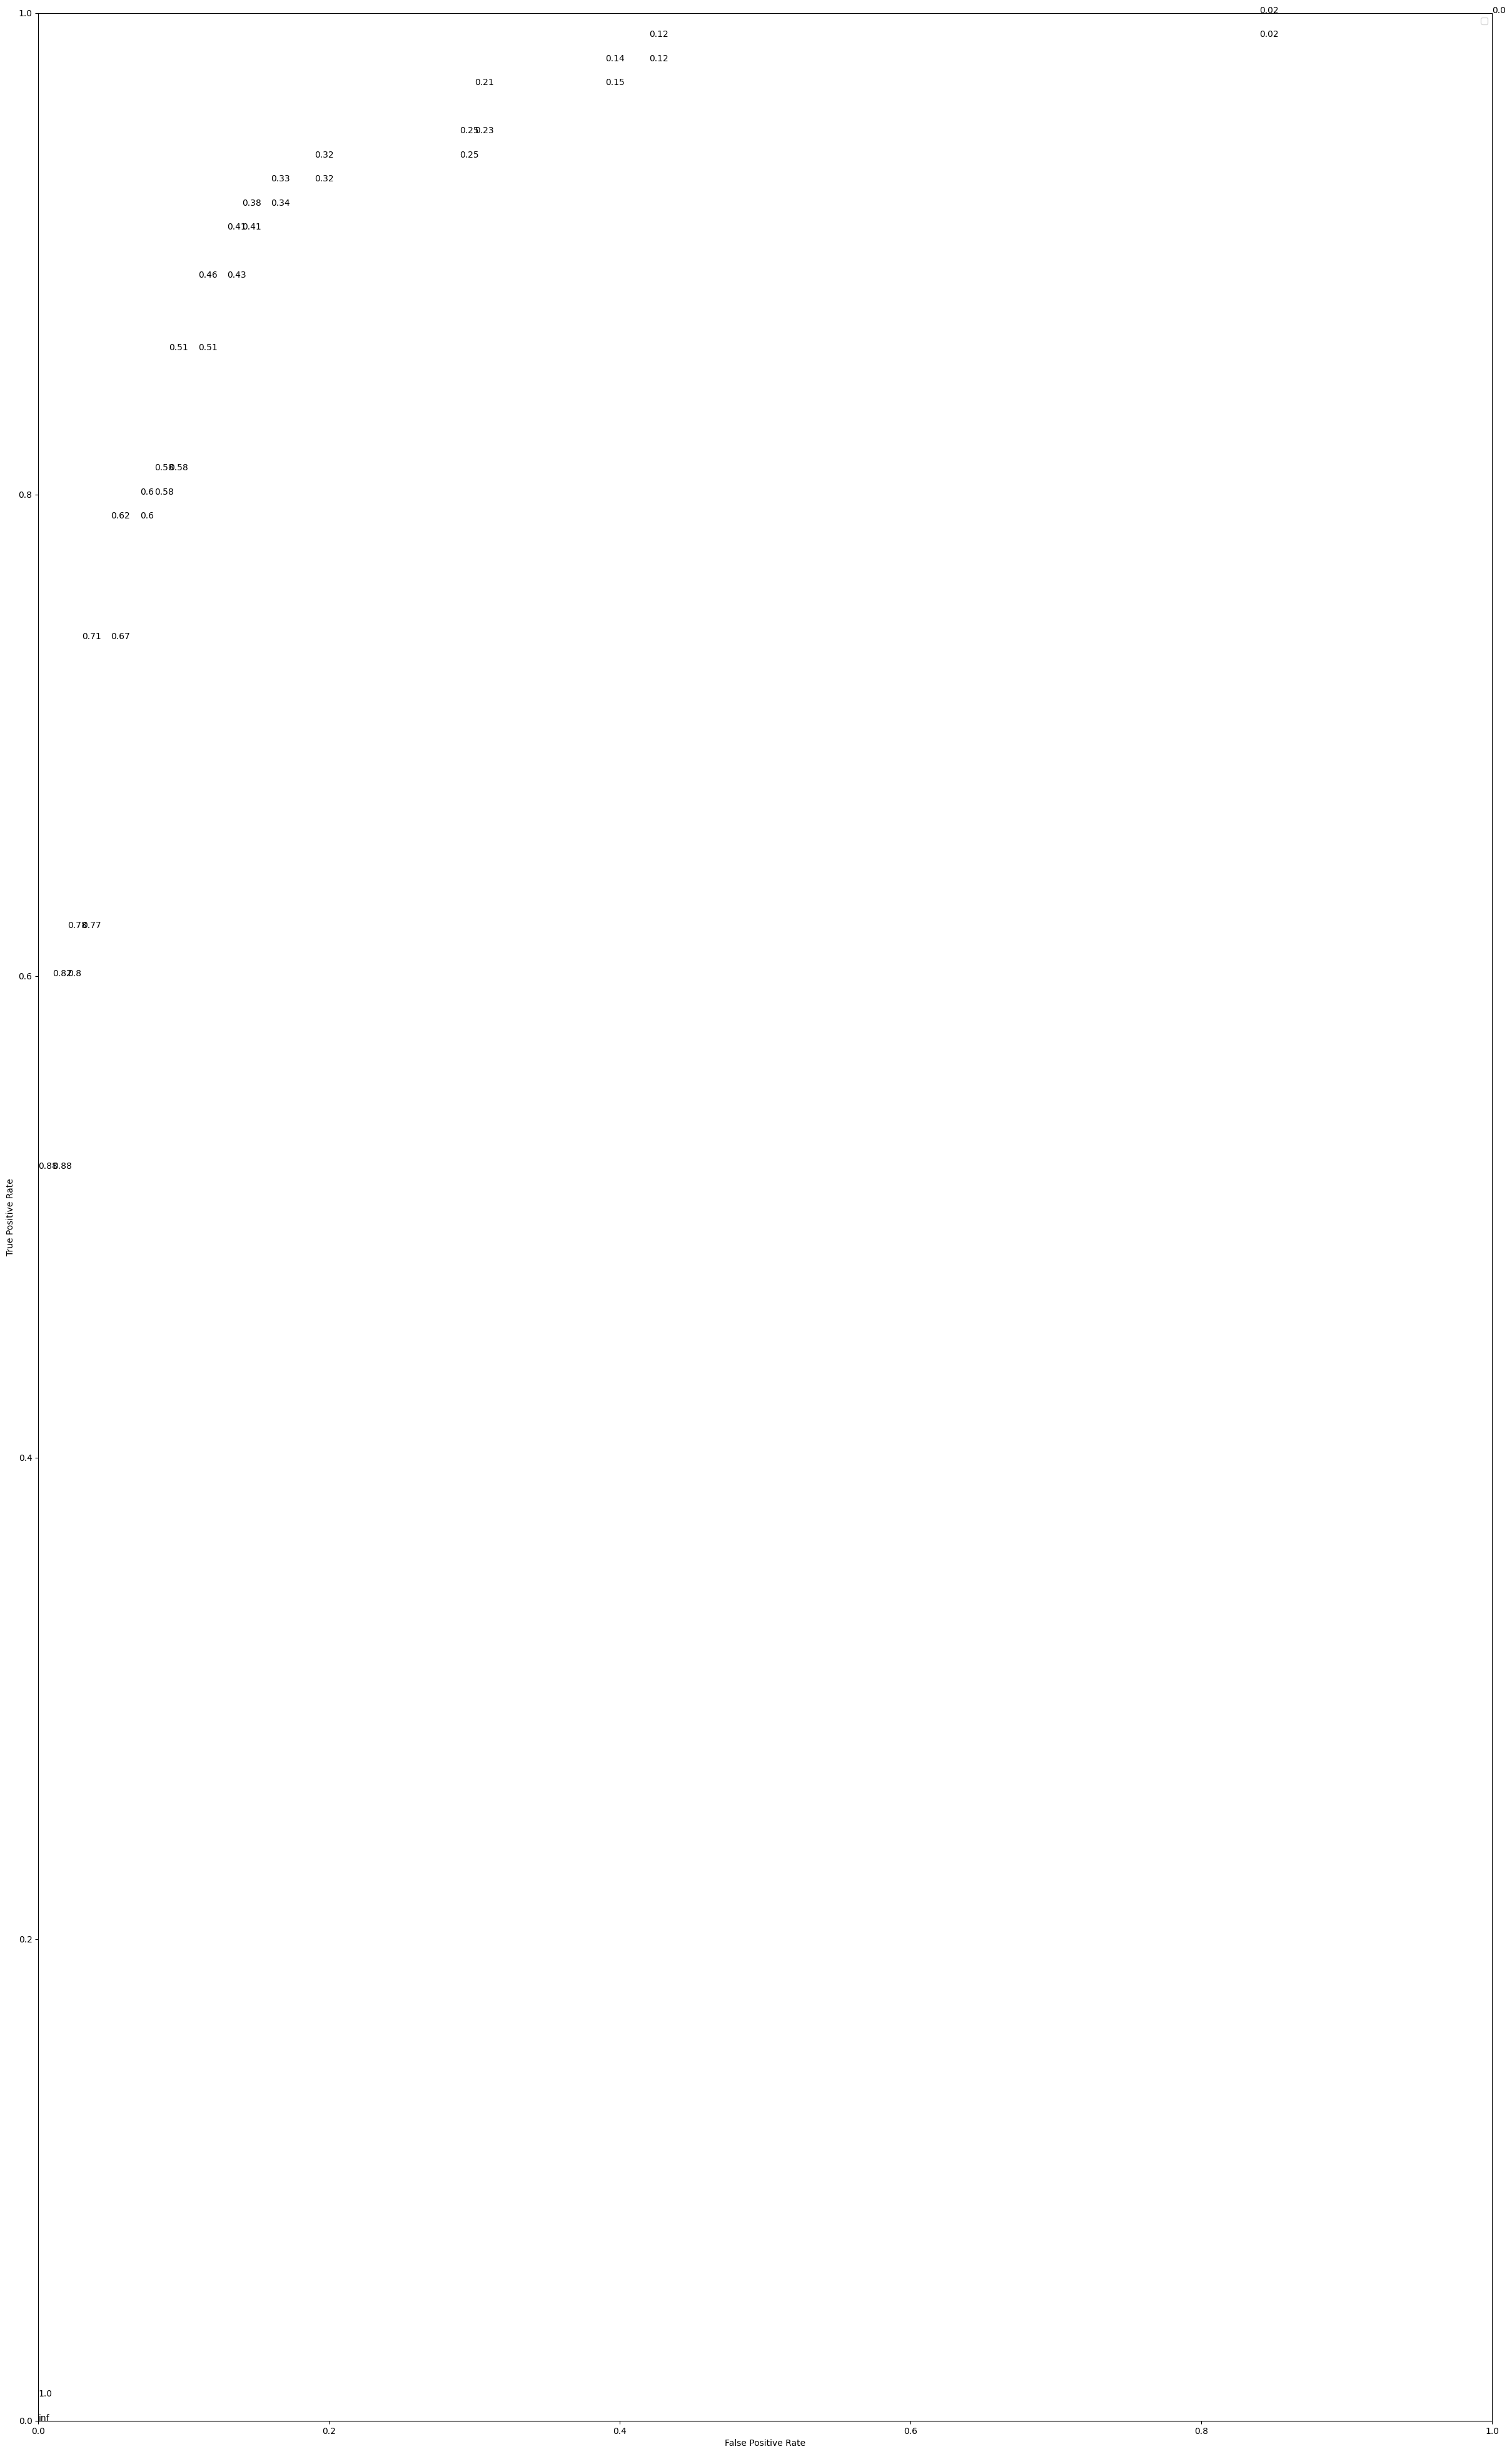

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot the roc curve for the model
import numpy as np

# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')

fig = plt.figure(figsize=(30,50))
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr,thresholds):   
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [172]:
print(y4_pred_prob[:4,-1])

[0.93765618 0.06143838 0.11782118 0.71705675]


In [171]:
print(y4_pred_prob[:4,:-1])

[[0.06234382]
 [0.93856162]
 [0.88217882]
 [0.28294325]]


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import make_classification
X1,y1 = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
print("X1 => ",X1.shape," y1 => ",y1.shape)

X1 =>  (1000, 20)  y1 =>  (1000,)


In [38]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.60, random_state=18)

from sklearn.linear_model import LogisticRegression
logreg1 =  LogisticRegression()
logreg1.fit(X1_train, y1_train)
y1_pred = logreg1.predict(X1_test)
print(y1_pred)

[0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 1 1 

print(y1_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_true=y1_test, y_pred=y1_pred)
print("Accuracy Score is ",acc_score*100, "%")
cmatrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
print("Confusion Matrix\n", cmatrix)
print(classification_report(y_true=y1_test, y_pred=y1_pred))

Accuracy Score is  86.66666666666667 %
Confusion Matrix
 [[261  46]
 [ 34 259]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       307
           1       0.85      0.88      0.87       293

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [46]:

from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

from sklearn.model_selection import GridSearchCV
# LogisticRegression(penalty="", C=1.0, solver="")
param_dict = {
    "penalty":['l1','l2','elasticnet'],
    "C":[10,100,10,0.1,0.01],
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid=GridSearchCV(estimator=logreg1, param_grid=param_dict, scoring='accuracy', cv=stratified_cv)
grid.fit(X=X1_train, y=y1_train)

/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means

,estimator,LogisticRegression()
,param_grid,"{'C': [10, 100, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y1_pred_gridcv=grid.predict(X1_test)

print("Grid Search taken ",grid.best_params_)
print("Grid Search Best Score is ", grid.best_score_*100)
acc_score = accuracy_score(y_true=y1_test, y_pred=y1_pred_gridcv)
print("Grid Accuracy Score is ",acc_score*100, "%")
cmatrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred_gridcv)
print("Grid Confusion Matrix\n", cmatrix)
print(classification_report(y_true=y1_test, y_pred=y1_pred_gridcv))

Grid Search taken  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Grid Search Best Score is  85.50000000000001
Grid Accuracy Score is  87.5 %
Grid Confusion Matrix
 [[270  37]
 [ 38 255]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       307
           1       0.87      0.87      0.87       293

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.88      0.87       600



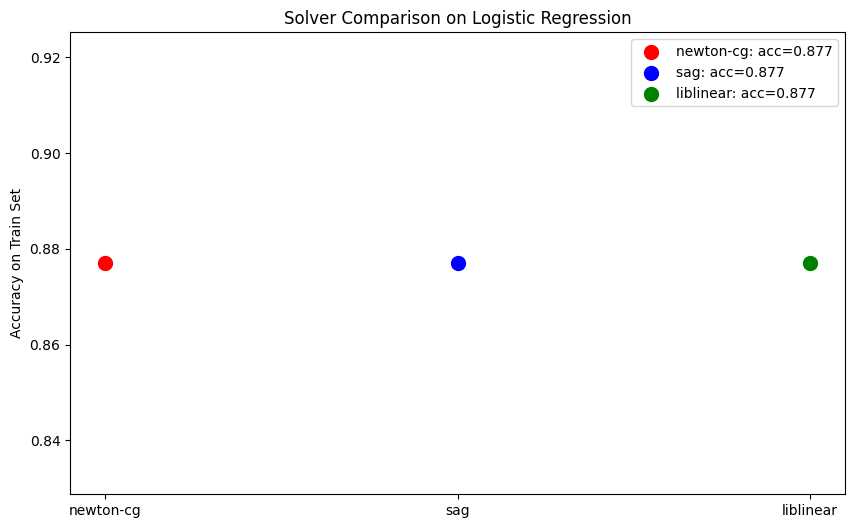

In [42]:
solvers = ["newton-cg", "sag", "liblinear"]
colors = ["red", "blue", "green"]

plt.figure(figsize=(10, 6))

for solver, color in zip(solvers, colors):
    model = LogisticRegression(solver=solver, max_iter=200, C=1.0)
    model.fit(X1, y1)
    score = model.score(X1, y1)
    plt.scatter([solver], [score], color=color, s=100, label=f"{solver}: acc={score:.3f}")

plt.title("Solver Comparison on Logistic Regression")
plt.ylabel("Accuracy on Train Set")
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
randomcv=RandomizedSearchCV(estimator=logreg1,cv=stratified_cv, param_distributions=param_dict)
randomcv.fit(X1_train, y1_train)
y1_pred_randomcv=randomcv.predict(X1_test)

print("Random Search taken ",grid.best_params_)
print("Random Search Best Score is ", grid.best_score_*100)
acc_score = accuracy_score(y_true=y1_test, y_pred=y1_pred_randomcv)
print("Random Accuracy Score is ",acc_score*100, "%")
cmatrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred_randomcv)
print("Random Confusion Matrix\n", cmatrix)
print(classification_report(y_true=y1_test, y_pred=y1_pred_randomcv))

Random Search taken  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Random Search Best Score is  85.50000000000001
Random Accuracy Score is  87.16666666666667 %
Random Confusion Matrix
 [[264  43]
 [ 34 259]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       307
           1       0.86      0.88      0.87       293

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means

## Multiclass Logistic Regression

In [53]:
from sklearn.datasets import make_classification
X2,y2 = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=12)
print("X2 => ",X2.shape," y2 => ",y2.shape)
print(X2)
print(y2)

X2 =>  (1000, 20)  y2 =>  (1000,)
[[-2.88480073  0.47694188 -0.31665466 ...  1.65509312 -0.24547302
   0.46372483]
 [-0.73303483 -1.74026688  1.25658859 ... -0.34497215 -0.96491177
   0.84467846]
 [ 0.44556621  0.51557882 -0.55201925 ... -0.99992281  0.506886
  -0.62643799]
 ...
 [-1.59040488 -0.14170325  0.12296055 ... -1.2372095   0.10015399
   0.42556213]
 [-1.46805494  0.02550331 -0.59823083 ...  0.15801957  0.11502699
   1.79110674]
 [-0.43164005 -1.27678876  0.9498851  ... -1.38903191  2.04404613
   2.07517971]]
[0 2 1 1 0 1 0 0 1 0 2 1 1 1 1 0 2 1 1 2 1 2 1 0 0 1 1 2 1 1 1 2 2 0 0 1 1
 0 2 1 0 0 1 0 0 0 2 2 2 2 2 0 2 1 0 2 2 0 2 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 1 1 0 2 1 2 0 2 0 1 0 0 0 1 1 0 2 0 0 1 0 0 1 2 0 1 1 2 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 2 2 0 1 2 1 0 0 1 0 1 2 2 1 1 0 1 2 1 1 0 1 2 2 2 1 1 0 0 1
 2 2 0 0 1 0 2 0 2 2 2 0 2 0 1 2 2 2 1 0 2 0 2 0 2 0 2 2 2 0 0 0 1 2 2 0 1
 2 1 2 2 1 2 1 2 1 1 0 1 0 0 1 2 2 0 0 0 0 0 2 0 2 0 1 1 2 0 2 0 2 2 2 0 2
 1 1 0 2 0 1 0 2 2 2 1 2 2

In [67]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.30, random_state=35)

from sklearn.linear_model import LogisticRegression
logreg2 =  LogisticRegression(multi_class='ovr')
logreg2.fit(X2_train, y2_train)
y2_pred = logreg2.predict(X2_test)
print("Y2 actual is")
print(y2_test)

print("Y2_Predicted is")
print(y2_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score = accuracy_score(y_true=y2_test, y_pred=y2_pred)
print("Accuracy Score is ",acc_score*100, "%")
cmatrix = confusion_matrix(y_true=y2_test, y_pred=y2_pred)
print("Confusion Matrix\n", cmatrix)
print(classification_report(y_true=y2_test, y_pred=y2_pred))

Y2 actual is
[2 0 1 2 2 1 0 0 0 1 0 0 2 1 0 1 2 1 2 1 1 1 1 1 0 1 2 2 0 1 0 1 2 2 2 0 2
 1 1 1 2 1 2 1 1 1 2 0 2 1 0 0 0 0 2 0 0 2 0 0 2 0 1 1 0 1 2 1 2 1 1 2 1 0
 0 1 1 0 2 0 1 0 2 0 2 1 2 1 1 1 1 2 2 0 1 0 2 1 0 2 0 2 2 2 1 0 1 2 0 1 1
 0 0 2 1 0 2 0 1 2 0 2 1 1 1 1 1 1 0 1 2 2 0 1 2 1 1 2 0 1 0 0 1 2 1 0 1 1
 0 1 0 2 2 1 0 2 0 2 2 1 1 0 2 1 2 1 1 2 2 0 2 2 2 0 2 1 2 0 2 0 0 0 1 2 2
 1 1 1 0 1 1 1 2 0 1 2 1 2 1 2 0 2 1 2 1 0 2 2 0 1 2 2 0 2 1 2 2 0 0 0 2 0
 2 0 0 1 0 2 1 0 2 1 2 1 2 2 1 0 1 2 2 2 2 1 1 1 1 2 2 1 2 0 2 1 1 1 1 2 1
 2 0 2 0 1 2 1 2 0 0 0 2 0 2 2 1 2 2 0 0 0 2 1 2 0 0 1 1 2 0 0 2 0 0 0 2 1
 0 2 1 0]
Y2_Predicted is
[2 2 1 1 2 2 2 0 0 1 2 1 1 1 0 2 2 0 1 1 1 1 0 0 0 0 0 2 0 2 0 1 2 0 0 0 2
 1 2 2 2 1 2 0 1 0 2 0 1 2 0 1 2 1 0 0 2 1 1 1 2 0 1 0 0 2 2 2 2 0 2 1 1 1
 0 1 2 2 2 0 1 1 2 0 0 1 2 2 1 0 0 0 0 1 0 2 0 1 0 2 0 1 1 2 1 0 1 1 0 2 0
 2 2 2 2 0 2 0 0 2 2 1 1 0 1 0 1 0 0 0 2 2 2 2 2 0 2 2 0 1 1 0 1 0 1 0 0 0
 0 2 2 0 2 2 2 2 0 2 2 2 0 1 2 1 2 1 0 2 2 1 2 2 2 1 2 1 1 0 

In [66]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

from sklearn.model_selection import GridSearchCV
# LogisticRegression(penalty="", C=1.0, solver="")
param_dict = {
    "penalty":['l1','l2','elasticnet'],
    "C":[10,100,10,0.1,0.01],
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid2=GridSearchCV(estimator=logreg2, param_grid=param_dict, scoring='accuracy', cv=stratified_cv)
grid2.fit(X=X2_train, y=y2_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y2_pred_gridcv=grid2.predict(X2_test)

print("Grid Search taken ",grid2.best_params_)
print("Actual Accuracy Score is ",accuracy_score(y_true=y2_test, y_pred=y2_pred)*100, "%")
print("Grid Search Best Score is ", grid2.best_score_*100)
print("Grid Accuracy Score is ",accuracy_score(y_true=y2_test, y_pred=y2_pred_gridcv)*100, "%")
print("Grid Confusion Matrix\n", confusion_matrix(y_true=y2_test, y_pred=y2_pred_gridcv))
print(classification_report(y_true=y2_test, y_pred=y2_pred_gridcv))

Grid Search taken  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Actual Accuracy Score is  52.33333333333333 %
Grid Search Best Score is  48.71428571428571
Grid Accuracy Score is  54.0 %
Grid Confusion Matrix
 [[52 17 21]
 [34 42 30]
 [21 15 68]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.53        90
           1       0.57      0.40      0.47       106
           2       0.57      0.65      0.61       104

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.53       300
weighted avg       0.54      0.54      0.53       300



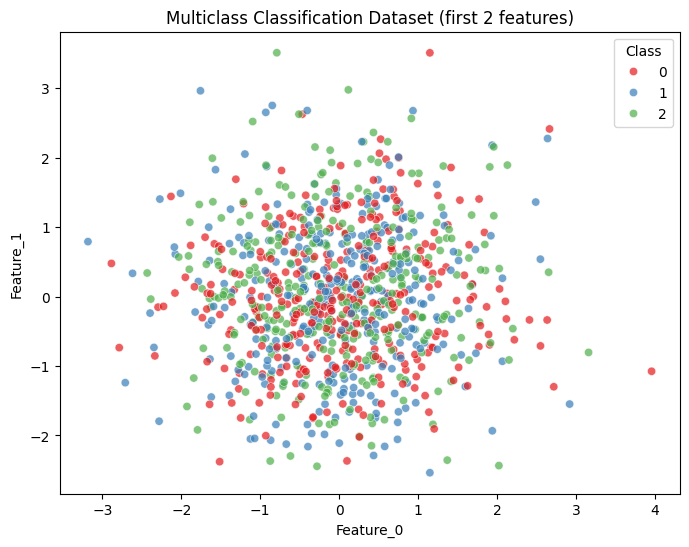

0    335
2    335
1    330
Name: count, dtype: int64
Counter({np.int64(0): 335, np.int64(2): 335, np.int64(1): 330})


In [83]:
import seaborn as sns
import pandas as pd
# Put into a DataFrame for seaborn
df = pd.DataFrame(X2, columns=[f"Feature_{i}" for i in range(X2.shape[1])])
df["Class"] = y2

# Scatterplot (using first two features)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="Feature_0", 
    y="Feature_1", 
    hue="Class", 
    palette="Set1", 
    alpha=0.7
)
plt.title("Multiclass Classification Dataset (first 2 features)")
plt.show()

print(pd.Series(y2).value_counts())
from collections import Counter
print(Counter(y2))

## Multiclass - imbalanced dataset


In [89]:
from sklearn.datasets import make_classification
X3,y3 = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=4, random_state=12, weights=[0.15,0.03,0.87])
print("X3 => ",X3.shape," y3 => ",y3.shape)
y3

X3 =>  (1000, 20)  y3 =>  (1000,)


array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

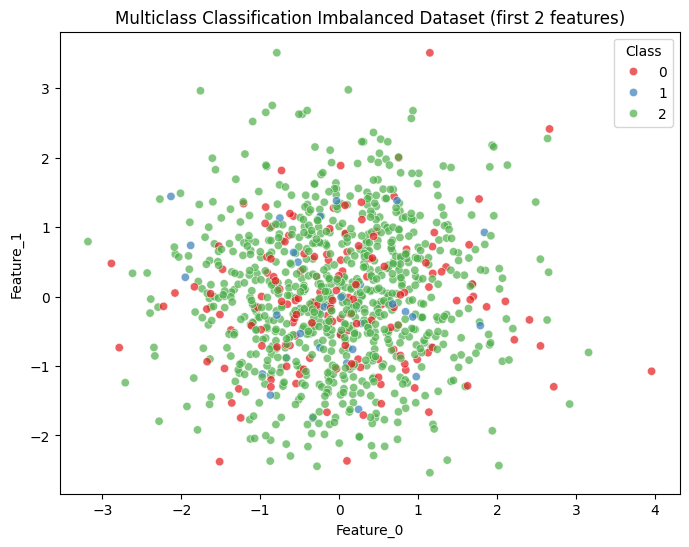

2    814
0    155
1     31
Name: count, dtype: int64
Counter({np.int64(2): 814, np.int64(0): 155, np.int64(1): 31})


In [90]:
import seaborn as sns
import pandas as pd
# Put into a DataFrame for seaborn
df = pd.DataFrame(X3, columns=[f"Feature_{i}" for i in range(X3.shape[1])])
df["Class"] = y3

# Scatterplot (using first two features)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="Feature_0", 
    y="Feature_1", 
    hue="Class", 
    palette="Set1", 
    alpha=0.7
)
plt.title("Multiclass Classification Imbalanced Dataset (first 2 features)")
plt.show()

print(pd.Series(y3).value_counts())
from collections import Counter
print(Counter(y3))

In [96]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.30, random_state=35)

from sklearn.linear_model import LogisticRegression
logreg3 =  LogisticRegression(multi_class='ovr',class_weight='balanced')
logreg3.fit(X3_train, y3_train)
y3_pred = logreg3.predict(X3_test)
print("Y3 actual is")
print(y3_test)

print("Y3_Predicted is")
print(y3_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score3 = accuracy_score(y_true=y3_test, y_pred=y3_pred)
print("Accuracy Score is ",acc_score3*100, "%")
cmatrix3 = confusion_matrix(y_true=y3_test, y_pred=y3_pred)
print("Confusion Matrix\n", cmatrix3)
print(classification_report(y_true=y3_test, y_pred=y3_pred))



print("Unbalanced Class Weight")

logreg3 =  LogisticRegression(multi_class='ovr',class_weight=None)
logreg3.fit(X3_train, y3_train)
y3_pred = logreg3.predict(X3_test)
print("Y3 actual is")
print(y3_test)

print("Y3_Predicted is")
print(y3_pred)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_score3 = accuracy_score(y_true=y3_test, y_pred=y3_pred)
print("Accuracy Score is ",acc_score3*100, "%")
cmatrix3 = confusion_matrix(y_true=y3_test, y_pred=y3_pred)
print("Confusion Matrix\n", cmatrix3)
print(classification_report(y_true=y3_test, y_pred=y3_pred))

Y3 actual is
[2 0 2 2 2 2 1 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2
 1 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2]
Y3_Predicted is
[2 2 0 0 2 0 2 2 0 2 2 2 0 2 0 2 2 2 2 0 2 1 2 1 0 2 0 2 1 2 2 2 2 2 0 0 2
 2 2 1 2 0 2 2 0 2 2 0 2 0 0 0 0 2 0 0 1 1 2 0 2 0 2 2 2 1 2 2 2 0 1 1 2 0
 0 0 1 2 2 0 1 1 2 0 0 0 2 2 1 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 0
 1 2 1 2 0 2 0 2 1 2 2 2 2 2 0 2 2 0 2 2 2 2 1 2 0 1 2 2 2 2 0 0 0 0 2 2 2
 0 0 2 0 2 2 2 2 0 2 2 2 2 2 2 0 1 1 2 2 2 0 2 1 2 2 2 0 0 1 